# LogisticReg Test
***
In this notebook, I'll try to use my logistic regression implementation (LogisticReg) over a simple datasets I created, this training data consists of 18 surface points labeled either 0 or 1, this points can be separated by a circle.

First of all, we import:
1. *numpy* for linear algebra (matrix handling) though it's not required, it's already imported by LinearReg
2. *matplotlib.pyplot* to do some plotting and see the results
3. *pandas* to load the data from a csv file
4. *LogisticReg* (personal implementation)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LogisticReg import LogisticReg as lgr

Now let's load our dataset:

In [5]:
data = pd.read_csv('./datasets/LogisticReg.csv')

To visualize the structure, we can use the .head(n) method to return the first *n* rows:

In [6]:
data.head(4)

,ID,x1,x2,y
0,0,0.0,0.00,0
1,1,0.0,0.70,0
2,2,-0.5,0.50,0
3,3,-0.5,1.23,0


Now we extract our features' matrix & labels vector by:

In [67]:
X = data.iloc[:, 1:3].to_numpy(dtype=np.float32)
y = data.iloc[:, 3].to_numpy(dtype=np.int32)

print('X: ')
print(X[:4, :]) # print first 4 rows
print('')
print('feature vector = ', y)

X: 
[[ 0.    0.  ]
 [ 0.    0.7 ]
 [-0.5   0.5 ]
 [-0.5   1.23]]

feature vector =  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


Below, I visualize the data on a 2D Surface with pyplot

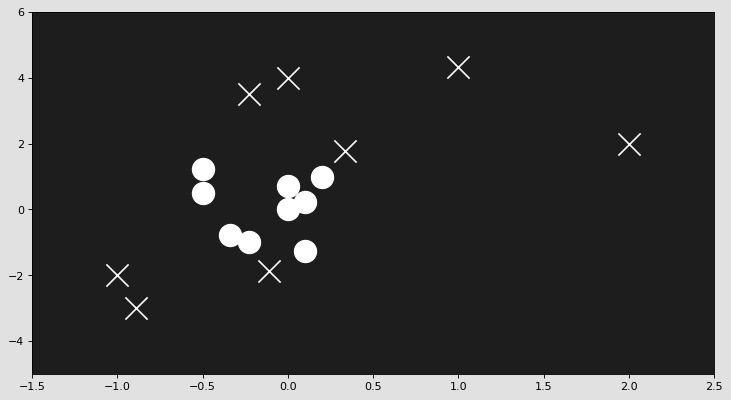

In [68]:
X1 = X[:, 0] # feature 1
X2 = X[:, 1] # feature 2

X1_True = np.array([x1 for ind, x1 in enumerate(X1) if y[ind] == 1]) # x1's labeled true (1)
X2_True = np.array([x2 for ind, x2 in enumerate(X2) if y[ind] == 1]) # x2's labeled true (1)


X1_False = np.array([x1 for ind, x1 in enumerate(X1) if y[ind] == 0])
X2_False = np.array([x2 for ind, x2 in enumerate(X2) if y[ind] == 0])


fig = plt.figure(figsize=(11, 6), dpi=80, facecolor='#e1e1e1')
ax = fig.add_subplot(111)
ax.set_facecolor('#1d1d1d')

ax.scatter(X1_True, X2_True, marker='x', c='w', s=400)
ax.scatter(X1_False, X2_False, marker='o', c='w', s=400)

plt.ylim((-5, 6))
plt.xlim((-1.5, 2.5))

plt.show()

Before training our model, it'll be useful to  standarize the data and then add a bias feaure *X_0 = 1*

In [9]:
X_std = np.std(X, axis=0)
X_mean = np.mean(X, axis=0)

# X = (X - X_mean) / X_std


print(X[:4, :])

[[ 0.    0.  ]
 [ 0.    0.7 ]
 [-0.5   0.5 ]
 [-0.5   1.23]]


In [27]:
X_sqr = X ** 2
X_sqr = np.insert(X_sqr, [0], 1, axis=1)

model = lgr().fit(X_sqr, y, learning_rate=0.01, regularization_rate=0, tol=1e-4, max_iter=1200,
                  verbose=1)

iteration  0  error =  0.6618346959678902
iteration  1  error =  0.6373664195836231
iteration  2  error =  0.6180107001131727
iteration  3  error =  0.6024495005026816
iteration  4  error =  0.589720038620746
iteration  5  error =  0.5791292696588146
iteration  6  error =  0.570178082438286
iteration  7  error =  0.56250391212936
iteration  8  error =  0.5558400141745491
iteration  9  error =  0.5499872862653143
iteration  10  error =  0.5447948914347106
iteration  11  error =  0.5401468820134091
iteration  12  error =  0.5359528820160857
iteration  13  error =  0.532141520349716
iteration  14  error =  0.5286557429178069
iteration  15  error =  0.525449421659952
iteration  16  error =  0.5224848695519255
iteration  17  error =  0.519730996381978
iteration  18  error =  0.5171619234344144
iteration  19  error =  0.5147559308752492
iteration  20  error =  0.5124946492099975
iteration  21  error =  0.5103624318321451
iteration  22  error =  0.5083458633890713
iteration  23  error =  0.50

iteration  198  error =  0.39982062710534844
iteration  199  error =  0.39943765476439297
iteration  200  error =  0.3990555393521276
iteration  201  error =  0.3986742763912765
iteration  202  error =  0.3982938614715351
iteration  203  error =  0.3979142902478394
iteration  204  error =  0.3975355584386891
iteration  205  error =  0.3971576618245238
iteration  206  error =  0.3967805962461488
iteration  207  error =  0.3964043576032108
iteration  208  error =  0.3960289418527194
iteration  209  error =  0.3956543450076151
iteration  210  error =  0.39528056313538046
iteration  211  error =  0.39490759235669404
iteration  212  error =  0.39453542884412546
iteration  213  error =  0.39416406882086924
iteration  214  error =  0.3937935085595174
iteration  215  error =  0.39342374438086897
iteration  216  error =  0.3930547726527746
iteration  217  error =  0.39268658978901655
iteration  218  error =  0.39231919224822104
iteration  219  error =  0.39195257653280297
iteration  220  error 

iteration  527  error =  0.3061227799360847
iteration  528  error =  0.30591009703642846
iteration  529  error =  0.30569773813636775
iteration  530  error =  0.30548570248341517
iteration  531  error =  0.30527398932736294
iteration  532  error =  0.30506259792027407
iteration  533  error =  0.30485152751647404
iteration  534  error =  0.304640777372542
iteration  535  error =  0.3044303467473025
iteration  536  error =  0.30422023490181677
iteration  537  error =  0.3040104410993747
iteration  538  error =  0.3038009646054863
iteration  539  error =  0.3035918046878736
iteration  540  error =  0.30338296061646214
iteration  541  error =  0.30317443166337266
iteration  542  error =  0.30296621710291355
iteration  543  error =  0.3027583162115721
iteration  544  error =  0.3025507282680068
iteration  545  error =  0.30234345255303896
iteration  546  error =  0.30213648834964507
iteration  547  error =  0.3019298349429488
iteration  548  error =  0.3017234916202127
iteration  549  error

iteration  727  error =  0.2691741940352128
iteration  728  error =  0.2690138659227047
iteration  729  error =  0.2688537476227528
iteration  730  error =  0.26869383871046537
iteration  731  error =  0.26853413876209836
iteration  732  error =  0.2683746473550521
iteration  733  error =  0.26821536406786706
iteration  734  error =  0.26805628848022045
iteration  735  error =  0.26789742017292234
iteration  736  error =  0.2677387587279125
iteration  737  error =  0.2675803037282562
iteration  738  error =  0.267422054758141
iteration  739  error =  0.26726401140287287
iteration  740  error =  0.2671061732488727
iteration  741  error =  0.2669485398836728
iteration  742  error =  0.2667911108959131
iteration  743  error =  0.2666338858753381
iteration  744  error =  0.26647686441279245
iteration  745  error =  0.26632004610021814
iteration  746  error =  0.2661634305306509
iteration  747  error =  0.2660070172982164
iteration  748  error =  0.265850805998127
iteration  749  error =  0

iteration  1091  error =  0.22195725453574044
iteration  1092  error =  0.22185226936261415
iteration  1093  error =  0.2217473930707458
iteration  1094  error =  0.22164262548588073
iteration  1095  error =  0.2215379664341467
iteration  1096  error =  0.22143341574205289
iteration  1097  error =  0.22132897323648892
iteration  1098  error =  0.22122463874472365
iteration  1099  error =  0.2211204120944043
iteration  1100  error =  0.22101629311355525
iteration  1101  error =  0.22091228163057705
iteration  1102  error =  0.22080837747424534
iteration  1103  error =  0.22070458047370986
iteration  1104  error =  0.22060089045849346
iteration  1105  error =  0.2204973072584909
iteration  1106  error =  0.2203938307039679
iteration  1107  error =  0.22029046062556018
iteration  1108  error =  0.22018719685427238
iteration  1109  error =  0.22008403922147707
iteration  1110  error =  0.21998098755891368
iteration  1111  error =  0.21987804169868733
iteration  1112  error =  0.21977520147

In [28]:
cmatrix, precision, recall, f1_score, accuracy = model.confusion_matrix(X_sqr, y)
pd_cmatrix = pd.DataFrame(data=cmatrix, columns=['predicted-as-1', 'predicted-as-0'], 
                          index=['actual-1', 'actual-0'])
pd_cmatrix.head(2)

,predicted-as-1,predicted-as-0
actual-1,9,0
actual-0,0,9


In [29]:
print('accuracy = ', accuracy)
print('precision = ', precision)
print('recall = ', recall)
print('f1_score = ', f1_score)

accuracy =  1.0
precision =  1.0
recall =  1.0
f1_score =  1.0


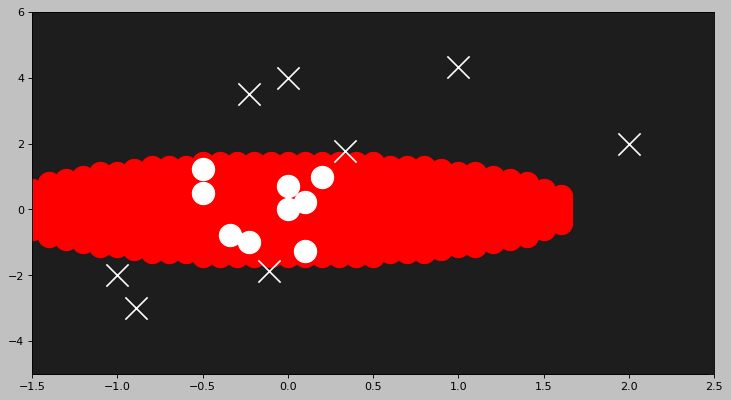

In [66]:
x1_range = np.arange(-1.5, 2.5, 0.1)
x2_range = np.arange(-5, 6, 0.1)
X_range = []
for x1 in x1_range:
    for x2 in x2_range:
        X_range.append([x1, x2])
X_range = np.array(X_range)

X_range_sqr = X_range ** 2

X_range_sqr = np.insert(X_range_sqr, [0], 1, axis=1) # 1dd bias feature
y_range = model.predict(X_range_sqr, prob=0, thresh=0.5)

x1_range_true = np.array([x1 for ind, x1 in enumerate(X_range[:, 0]) if y_range[ind] == 1])
x2_range_true = np.array([x2 for ind, x2 in enumerate(X_range[:, 1]) if y_range[ind] == 1])

x1_range_false = np.array([x1 for ind, x1 in enumerate(X_range[:, 0]) if y_range[ind] == 0])
x2_range_false = np.array([x2 for ind, x2 in enumerate(X_range[:, 1]) if y_range[ind] == 0])

fig = plt.figure(figsize=(11, 6), dpi=80, facecolor='#c1c1c1')
ax = fig.add_subplot(111)
ax.set_facecolor('#1d1d1d')

ax.scatter(x1_range_true, x2_range_true, marker='o', c='#1d1d1d', s=400)
ax.scatter(x1_range_false, x2_range_false, marker='o', c='r', s=400)

ax.scatter(X1_True, X2_True, marker='x', c='w', s=400)
ax.scatter(X1_False, X2_False, marker='o', c='w', s=400)

plt.ylim((-5, 6))
plt.xlim((-1.5, 2.5))

plt.show()

# Some References
***
1. [Wikipedia's Logistic Regression Article](https://en.wikipedia.org/wiki/Logistic_regression)
2. [Coursera Andrew Ng's Machine Learning Course ~ Logistic Regression](https://www.coursera.org/)
3. [Wikipedia's Cross Entropy Article](https://en.wikipedia.org/wiki/Cross_entropy)
4. [Wikipedia's Gradient Descent Article](https://en.wikipedia.org/wiki/Gradient_descent)
5. [Wikipedia's Confusion Matrix Article](https://en.wikipedia.org/wiki/Confusion_matrix)